In [1]:
#importing the necessary libraries
import numpy as np
import pandas as pd
#set the pandas display format so it will not use scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
#Loading the data
data = pd.read_csv('/Users/shradhachoudhary/Downloads/kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.000,3,1.000,1180,5650,1.000,0,0,...,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650
1,6414100192,20141209T000000,538000.000,3,2.250,2570,7242,2.000,0,0,...,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
2,5631500400,20150225T000000,180000.000,2,1.000,770,10000,1.000,0,0,...,6,770,0,1933,0,98028,47.738,-122.233,2720,8062
3,2487200875,20141209T000000,604000.000,4,3.000,1960,5000,1.000,0,0,...,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000
4,1954400510,20150218T000000,510000.000,3,2.000,1680,8080,1.000,0,0,...,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503


In [3]:
data['date'] = data['date'].str.replace('T000000', '')
data['date'] = data['date'].astype(float)

In [4]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013.000,221900.000,3,1.000,1180,5650,1.000,0,0,...,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650
1,6414100192,20141209.000,538000.000,3,2.250,2570,7242,2.000,0,0,...,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
2,5631500400,20150225.000,180000.000,2,1.000,770,10000,1.000,0,0,...,6,770,0,1933,0,98028,47.738,-122.233,2720,8062
3,2487200875,20141209.000,604000.000,4,3.000,1960,5000,1.000,0,0,...,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000
4,1954400510,20150218.000,510000.000,3,2.000,1680,8080,1.000,0,0,...,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521.000,360000.000,3,2.500,1530,1131,3.000,0,0,...,8,1530,0,2009,0,98103,47.699,-122.346,1530,1509
21609,6600060120,20150223.000,400000.000,4,2.500,2310,5813,2.000,0,0,...,8,2310,0,2014,0,98146,47.511,-122.362,1830,7200
21610,1523300141,20140623.000,402101.000,2,0.750,1020,1350,2.000,0,0,...,7,1020,0,2009,0,98144,47.594,-122.299,1020,2007
21611,291310100,20150116.000,400000.000,3,2.500,1600,2388,2.000,0,0,...,8,1600,0,2004,0,98027,47.535,-122.069,1410,1287


In [5]:
#Dealing with missing values
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
#Checking for duplicates
data.duplicated().sum()

0

In [8]:
#Exploratory Data Analysis
data.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,...,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000
mean,4580301520.865,20143902.668,540088.142,3.371,2.115,2079.900,15106.968,1.494,0.008,0.234,...,7.657,1788.391,291.509,1971.005,84.402,98077.940,47.560,-122.214,1986.552,12768.456
std,2876565571.312,4436.582,367127.196,0.930,0.770,918.441,41420.512,0.540,0.087,0.766,...,1.175,828.091,442.575,29.373,401.679,53.505,0.139,0.141,685.391,27304.180
min,1000102.000,20140502.000,75000.000,0.000,0.000,290.000,520.000,1.000,0.000,0.000,...,1.000,290.000,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
25%,2123049194.000,20140722.000,321950.000,3.000,1.750,1427.000,5040.000,1.000,0.000,0.000,...,7.000,1190.000,0.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000
50%,3904930410.000,20141016.000,450000.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,...,7.000,1560.000,0.000,1975.000,0.000,98065.000,47.572,-122.230,1840.000,7620.000
75%,7308900445.000,20150217.000,645000.000,4.000,2.500,2550.000,10688.000,2.000,0.000,0.000,...,8.000,2210.000,560.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000
max,9900000190.000,20150527.000,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,...,13.000,9410.000,4820.000,2015.000,2015.000,98199.000,47.778,-121.315,6210.000,871200.000


Exploring PDF(Probility Distribution Functions) Of features

I take the data with no missing values and plot the PDF for variables with unusual descriptive values for further observation. I am looking for outliers in the features and good distribution. Outliers are observations that lay away from the vast majority of observations and can throw off the model's predictive ability. A great way to remove outliers is to eliminate a percentile or filter the data.

/var/folders/9m/6n635ztd50x4nk4tccn8jwbc0000gn/T/ipykernel_49000/3451957556.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['price'])


<Axes: xlabel='price', ylabel='Density'>

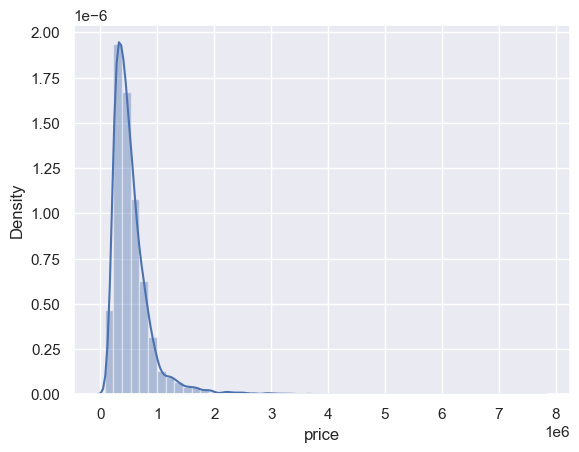

In [9]:
sns.distplot(data['price'])

In [10]:
#Hanndling outliers
z = data['price'].quantile(0.99)
df = data[data['price']<z]

/var/folders/9m/6n635ztd50x4nk4tccn8jwbc0000gn/T/ipykernel_49000/444587821.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

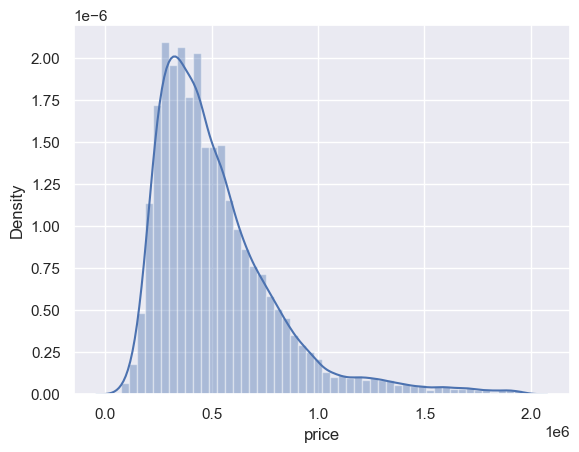

In [11]:
sns.distplot(df['price'])

In the distribution, I noticed outliers that range from up to 35. I isolate the bedrooms feature to visualize the column. After a search of king county and Seattle houses in Zillow, I find they do not pass 20, so I remove all entries with more than 16 since after 16, it seemed not many places were available

/var/folders/9m/6n635ztd50x4nk4tccn8jwbc0000gn/T/ipykernel_49000/3725469546.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedrooms'])


<Axes: xlabel='bedrooms', ylabel='Density'>

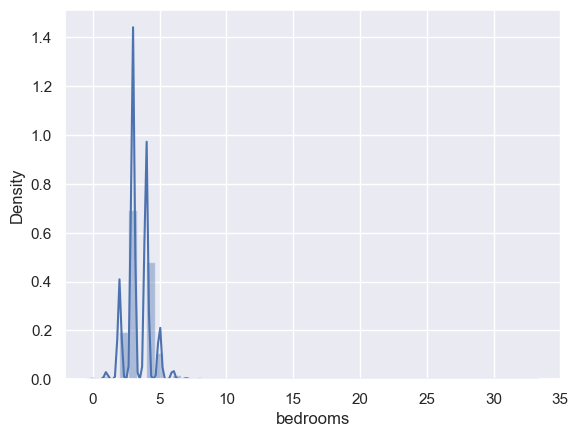

In [12]:
sns.distplot(df['bedrooms'])

In [13]:
bedrooms = pd.DataFrame(data['bedrooms'])
bedrooms = bedrooms.dropna(axis=0)

In [14]:
bedrooms.sort_values(by='bedrooms')

,bedrooms
9773,0
6994,0
9854,0
19452,0
14423,0
...,...
15161,10
13314,10
19254,10
8757,11


In [15]:
df1=df[df['bedrooms']<8]

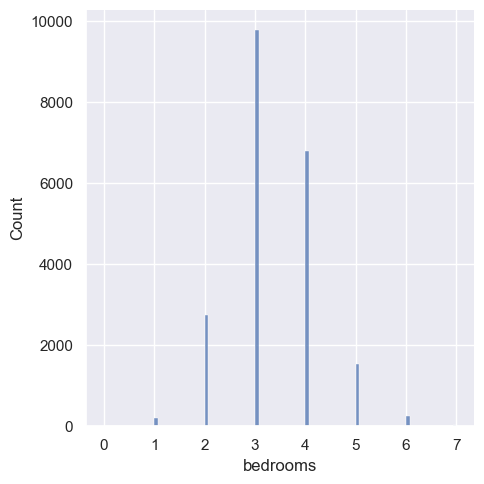

In [16]:
sns.displot(df1['bedrooms'])

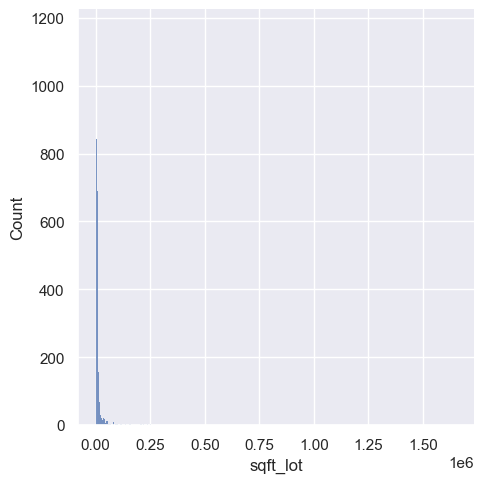

In [17]:
sns.displot(df1['sqft_lot'])

using the .quantile method I use 95% of observations from "sqft_lot" variable to handle outliers and achieve a normal distribution for optimal regression results

In [18]:
z = df['sqft_lot'].quantile(0.95)
df2 = df1[df1['sqft_lot']<z]

/var/folders/9m/6n635ztd50x4nk4tccn8jwbc0000gn/T/ipykernel_49000/594369096.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['sqft_lot'])


<Axes: xlabel='sqft_lot', ylabel='Density'>

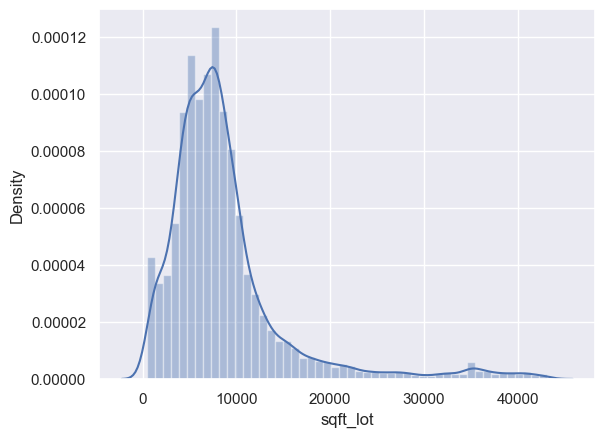

In [19]:
sns.distplot(df2['sqft_lot'])

/var/folders/9m/6n635ztd50x4nk4tccn8jwbc0000gn/T/ipykernel_49000/2209499823.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['sqft_above'])


<Axes: xlabel='sqft_above', ylabel='Density'>

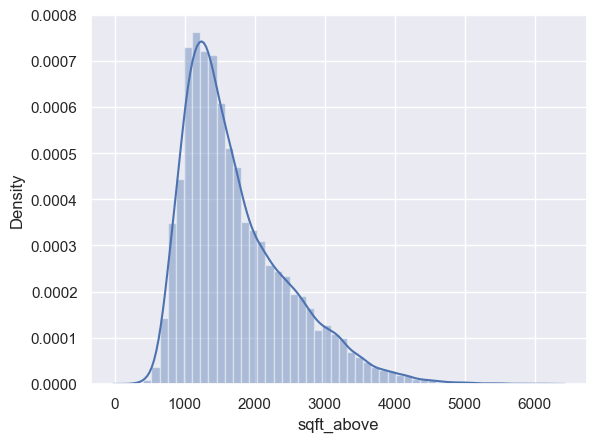

In [20]:
sns.distplot(df2['sqft_above'])

In [21]:
z=df2['sqft_above'].quantile(0.99)
df3=df2[df2['sqft_above']<z]

/var/folders/9m/6n635ztd50x4nk4tccn8jwbc0000gn/T/ipykernel_49000/2497009800.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3['sqft_above'])


<Axes: xlabel='sqft_above', ylabel='Density'>

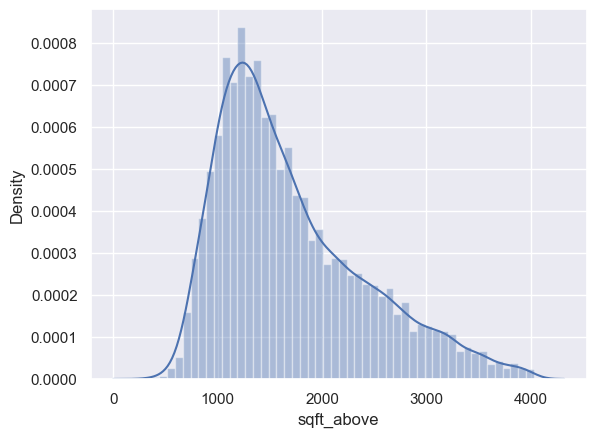

In [22]:
sns.distplot(df3['sqft_above'])

In [23]:
data_cleaned = df2.reset_index(drop=True)

In [24]:
data_cleaned.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,20305.000,20305.000,20305.000,20305.000,20305.000,20305.000,20305.000,20305.000,20305.000,20305.000,...,20305.000,20305.000,20305.000,20305.000,20305.000,20305.000,20305.000,20305.000,20305.000,20305.000
mean,4690500668.481,20143907.934,511763.619,3.351,2.081,2013.994,8736.877,1.488,0.005,0.210,...,7.597,1730.814,283.181,1970.550,81.497,98079.653,47.561,-122.222,1945.680,8617.084
std,2870454893.809,4438.325,281843.986,0.887,0.737,828.577,6637.069,0.542,0.070,0.718,...,1.109,756.593,425.140,29.582,395.038,53.985,0.137,0.136,654.296,8214.645
min,1000102.000,20140502.000,78000.000,0.000,0.000,290.000,520.000,1.000,0.000,0.000,...,1.000,290.000,0.000,1900.000,0.000,98001.000,47.156,-122.512,399.000,651.000
25%,2222900082.000,20140722.000,315450.000,3.000,1.500,1400.000,5000.000,1.000,0.000,0.000,...,7.000,1180.000,0.000,1951.000,0.000,98033.000,47.476,-122.332,1470.000,5000.000
50%,4037800140.000,20141016.000,442000.000,3.000,2.250,1870.000,7376.000,1.000,0.000,0.000,...,7.000,1530.000,0.000,1973.000,0.000,98072.000,47.572,-122.246,1810.000,7455.000
75%,7437100770.000,20150217.000,625000.000,4.000,2.500,2480.000,9910.000,2.000,0.000,0.000,...,8.000,2130.000,550.000,1997.000,0.000,98118.000,47.679,-122.140,2300.000,9620.000
max,9900000190.000,20150527.000,1960000.000,7.000,6.750,7620.000,43124.000,3.500,1.000,4.000,...,13.000,6110.000,3260.000,2015.000,2015.000,98199.000,47.778,-121.315,5790.000,335289.000


In [51]:
 def plot_bivariate_panel(vars_name, var_ref, data, n_cols=3):

    from math import ceil
    
    n_rows = ceil(len(vars_name) / n_cols)
    
    plt.figure(figsize=(7 * n_cols, 4 * n_rows))
    for idx, var in enumerate(vars_name, 1):
        
        mean = df.groupby(by=var).mean()[[var_ref]].reset_index()
        std = df.groupby(by=var).std()[var_ref].fillna(0)

        plt.subplot(n_rows, n_cols, idx)        
        sns.scatterplot(x=var, y=var_ref, data=mean)
        plt.ylabel(f'Mean {var_ref}')      

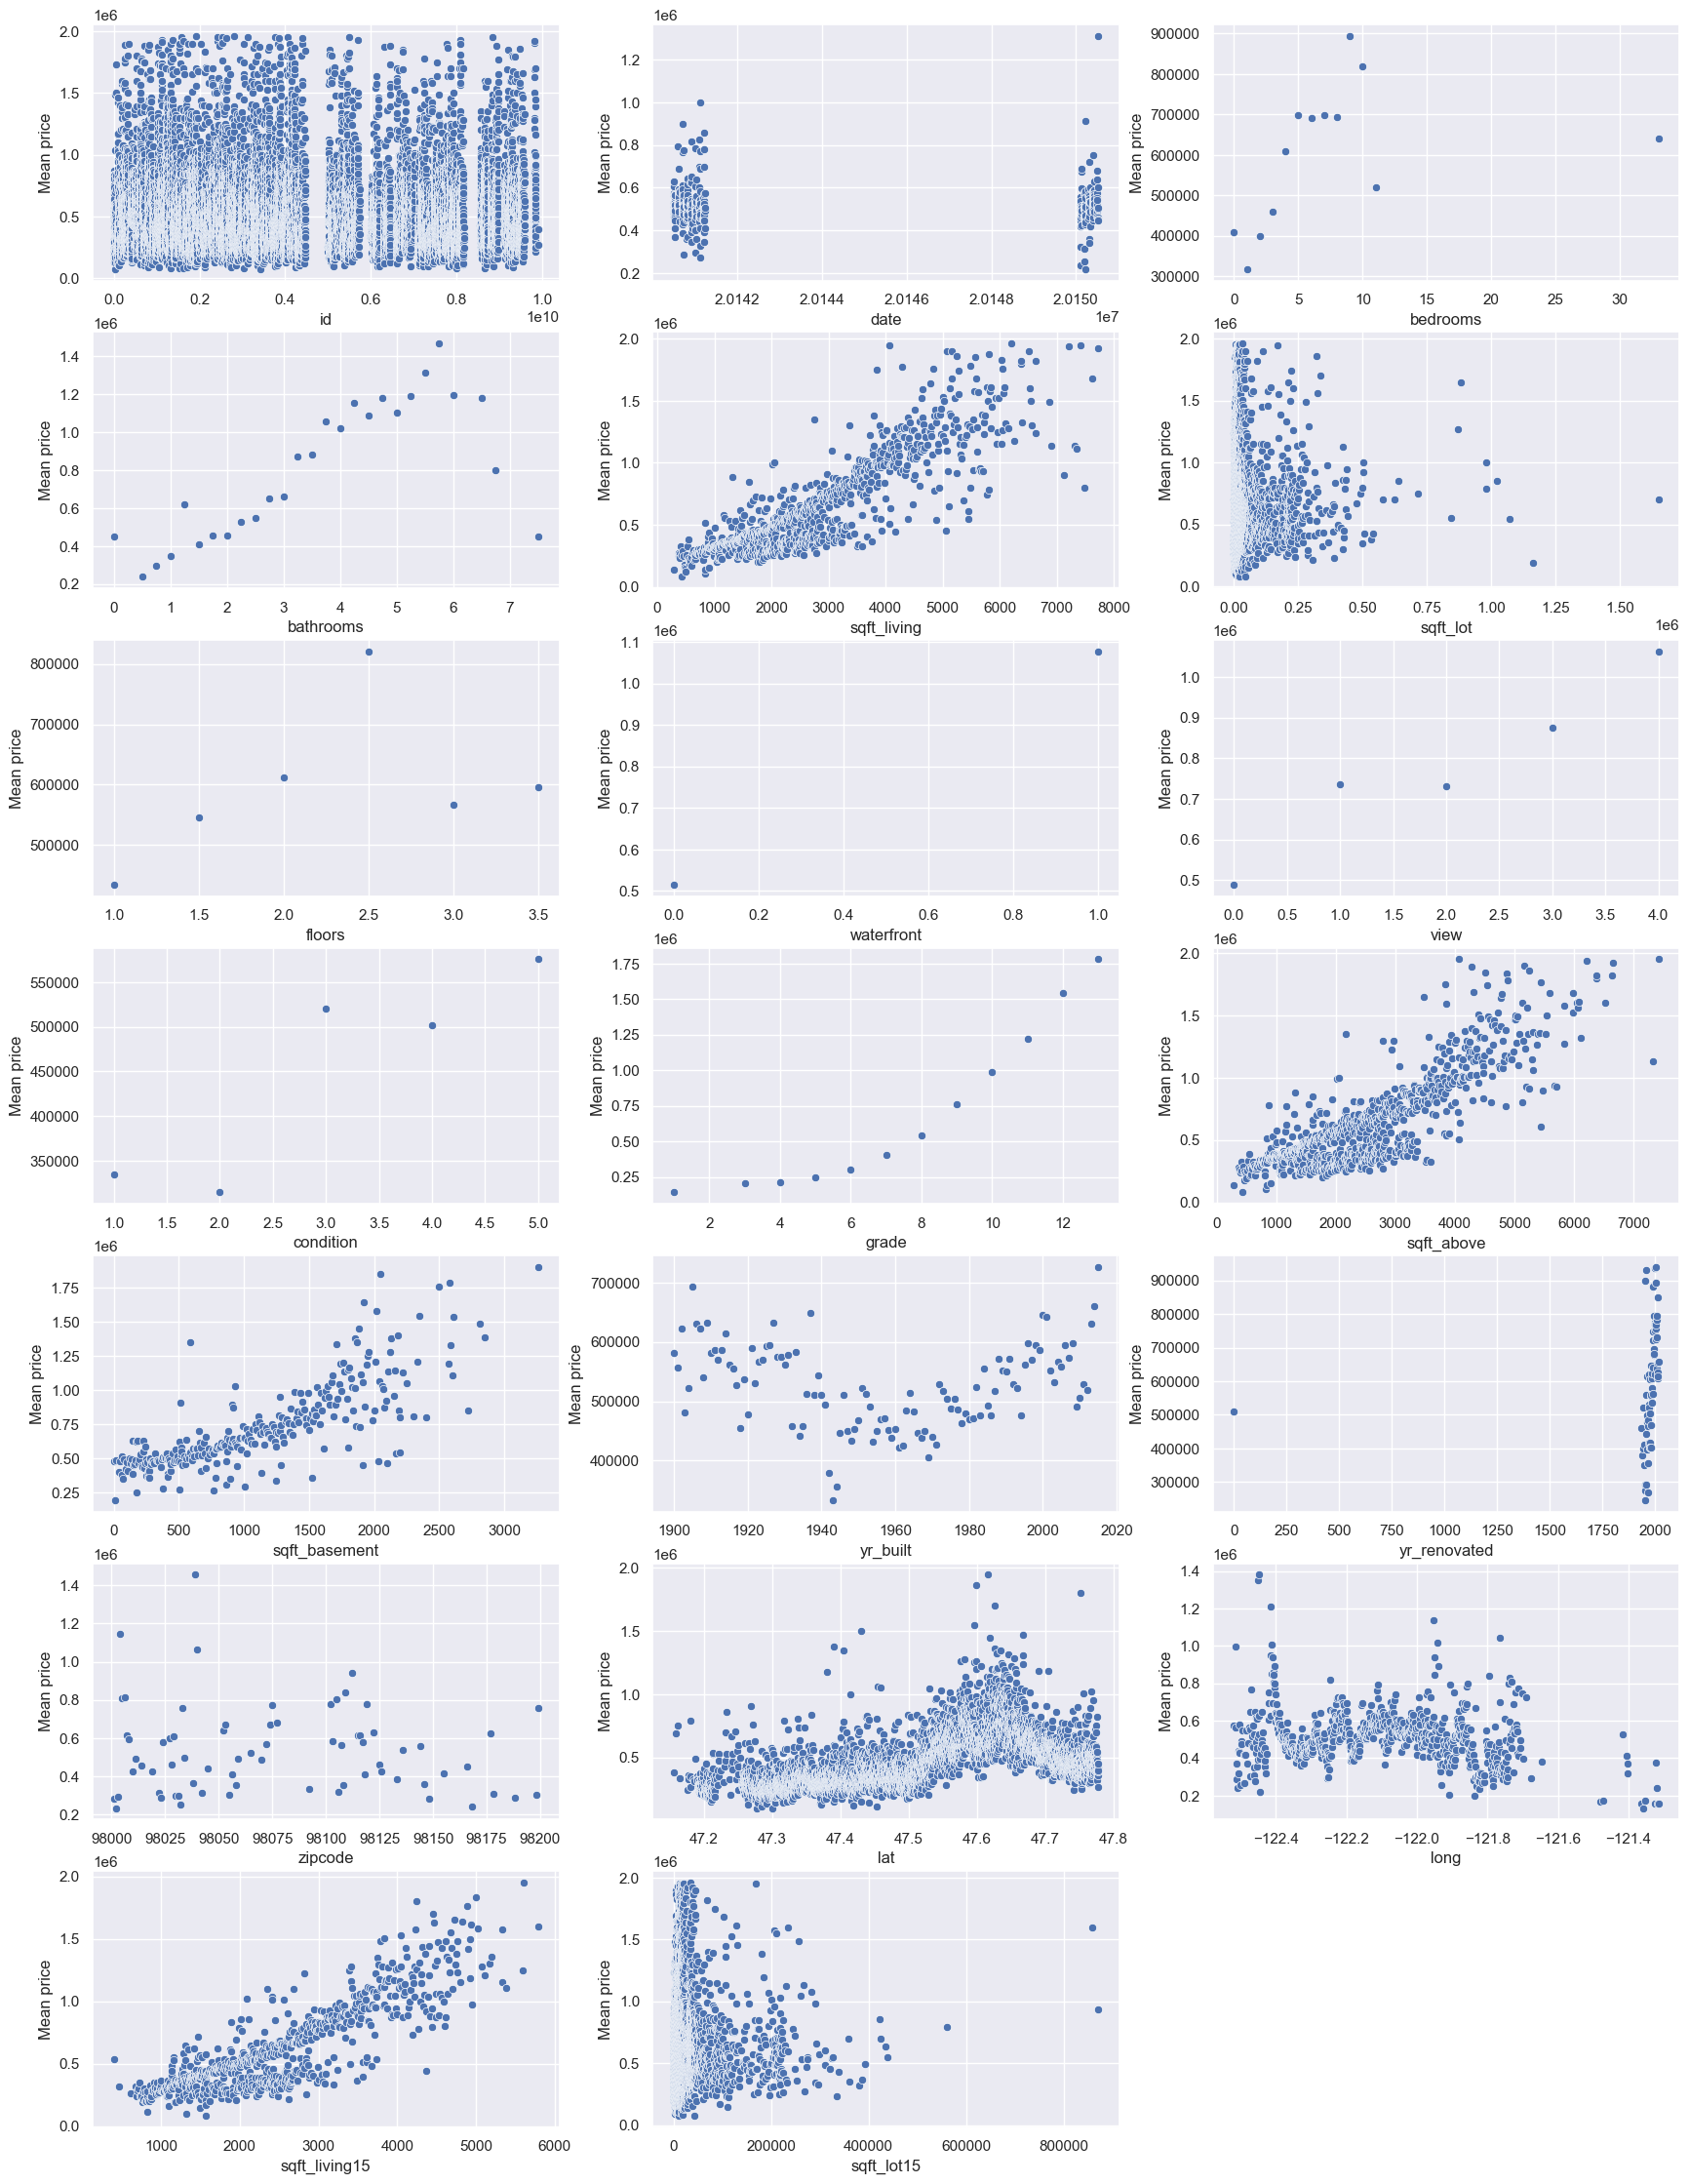

In [52]:
plot_bivariate_panel(data.drop(columns=['price']).columns, 'price', data)

Checking Of Least Squared (OLS) Assumptions

I use a scatter plot to plot possible predictors against "price" to check for linearity using the of least squared assumptions

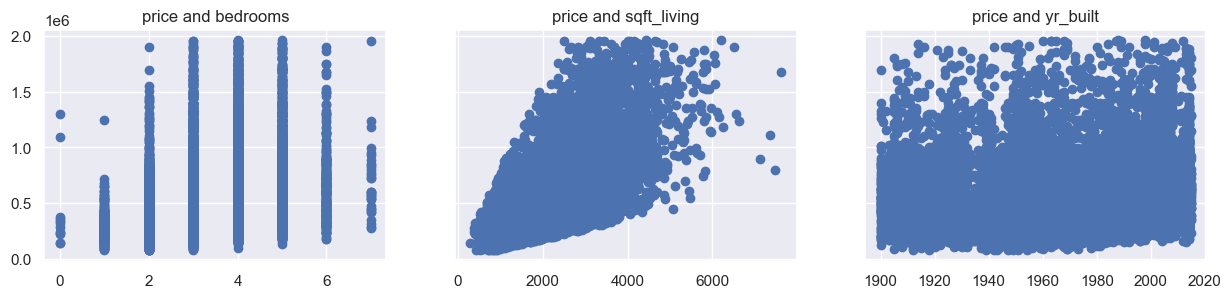

In [25]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['bedrooms'],data_cleaned['price'])
ax1.set_title('price and bedrooms')

ax2.scatter(data_cleaned['sqft_living'],data_cleaned['price'])
ax2.set_title('price and sqft_living')

ax3.scatter(data_cleaned['yr_built'],data_cleaned['price'])
ax3.set_title('price and yr_built')

plt.show()

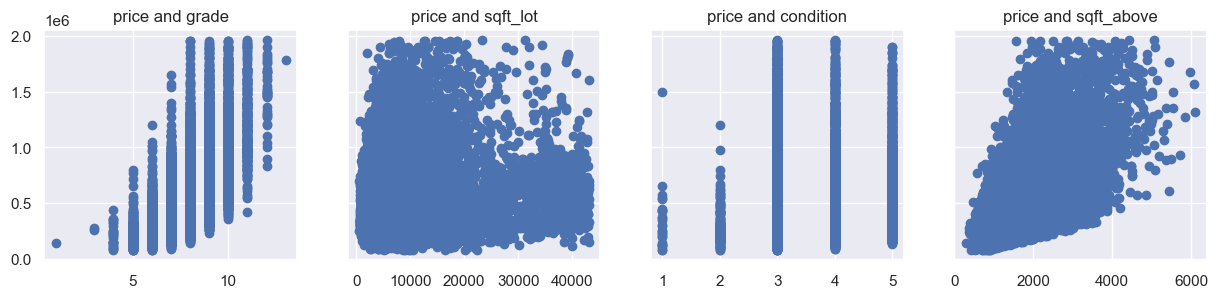

In [26]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['grade'],data_cleaned['price'])
ax1.set_title('price and grade')

ax2.scatter(data_cleaned['sqft_lot'],data_cleaned['price'])
ax2.set_title('price and sqft_lot')

ax3.scatter(data_cleaned['condition'],data_cleaned['price'])
ax3.set_title('price and condition')


ax4.scatter(data_cleaned['sqft_above'],data_cleaned['price'])
ax4.set_title('price and sqft_above')

plt.show()

The above graphs tell us that the variables are linearly related with price and we know the relationship between dependent and independent variable so this linear regression is best to use because of it's less complexity compared to other models.
One other advantage is that linear regression best models the predicting outcomes and since we need o predict the price of the house, I'll go forward with this model rather than Elastic Net, LASSO or Ridge regression.

In [27]:
#Relaxing assumptions
log_price = np.log(data_cleaned['price'])
data_cleaned['Log_price'] = log_price


Using .np.log to transfrom 'price' to 'Log_price' to create better linearty against other variables and drop price. Log returns the natural logarithm of a number and relaxs assumptions for better model fit.

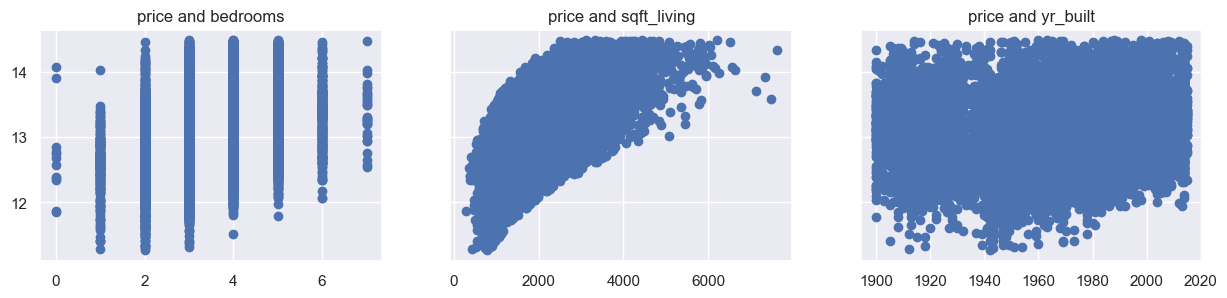

In [28]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['bedrooms'],data_cleaned['Log_price'])
ax1.set_title('price and bedrooms')

ax2.scatter(data_cleaned['sqft_living'],data_cleaned['Log_price'])
ax2.set_title('price and sqft_living')

ax3.scatter(data_cleaned['yr_built'],data_cleaned['Log_price'])
ax3.set_title('price and yr_built')


plt.show()


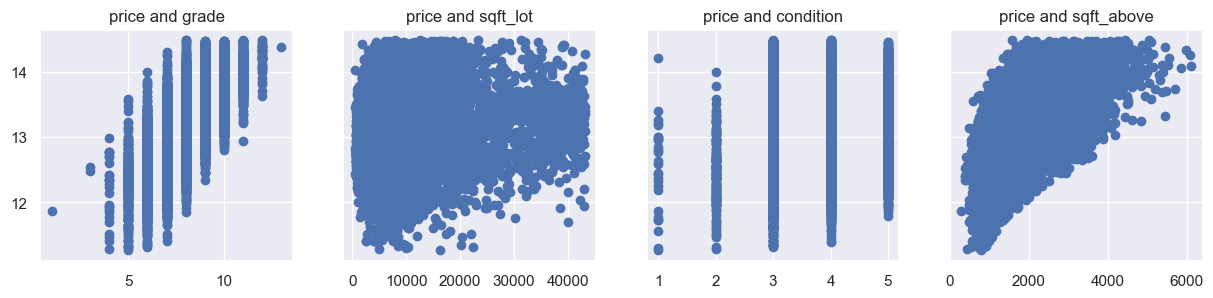

In [29]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['grade'],data_cleaned['Log_price'])
ax1.set_title('price and grade')

ax2.scatter(data_cleaned['sqft_lot'],data_cleaned['Log_price'])
ax2.set_title('price and sqft_lot')

ax3.scatter(data_cleaned['condition'],data_cleaned['Log_price'])
ax3.set_title('price and condition')


ax4.scatter(data_cleaned['sqft_above'],data_cleaned['Log_price'])
ax4.set_title('price and sqft_above')

plt.show()

In [30]:
data_cleaned = data_cleaned.drop(['price'], axis=1)
data_cleaned

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Log_price
0,7129300520,20141013.000,3,1.000,1180,5650,1.000,0,0,3,...,1180,0,1955,0,98178,47.511,-122.257,1340,5650,12.310
1,6414100192,20141209.000,3,2.250,2570,7242,2.000,0,0,3,...,2170,400,1951,1991,98125,47.721,-122.319,1690,7639,13.196
2,5631500400,20150225.000,2,1.000,770,10000,1.000,0,0,3,...,770,0,1933,0,98028,47.738,-122.233,2720,8062,12.101
3,2487200875,20141209.000,4,3.000,1960,5000,1.000,0,0,5,...,1050,910,1965,0,98136,47.521,-122.393,1360,5000,13.311
4,1954400510,20150218.000,3,2.000,1680,8080,1.000,0,0,3,...,1680,0,1987,0,98074,47.617,-122.045,1800,7503,13.142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20300,263000018,20140521.000,3,2.500,1530,1131,3.000,0,0,3,...,1530,0,2009,0,98103,47.699,-122.346,1530,1509,12.794
20301,6600060120,20150223.000,4,2.500,2310,5813,2.000,0,0,3,...,2310,0,2014,0,98146,47.511,-122.362,1830,7200,12.899
20302,1523300141,20140623.000,2,0.750,1020,1350,2.000,0,0,3,...,1020,0,2009,0,98144,47.594,-122.299,1020,2007,12.904
20303,291310100,20150116.000,3,2.500,1600,2388,2.000,0,0,3,...,1600,0,2004,0,98027,47.535,-122.069,1410,1287,12.899


Checking for multicolinatity
In order to verify the Multicollinearity assumption, I imported Variance Inflation from Stats Model. Fortunately, none of the features violated this assumption.

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [32]:
vif

,VIF,features
0,3.736,id
1,0.182,date
2,1.747,bedrooms
3,3.247,bathrooms
4,inf,sqft_living
5,2.475,sqft_lot
6,2.232,floors
7,1.180,waterfront
8,1.398,view
9,1.270,condition


Linear Regression Model

In [33]:
#Declaring dependent and independent variable
inputs= data_cleaned.drop(['Log_price'], axis=1)
targets= data_cleaned['Log_price']

In [34]:
#Scaling data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [35]:
x_scaled = scaler.transform(inputs)

In [36]:
x_scaled

array([[ 0.8496423 , -0.65227427, -0.39562816, ..., -0.26052148,
        -0.92571944, -0.36120336],
       [ 0.60047694, -0.60811238, -0.39562816, ..., -0.71755423,
        -0.39078024, -0.11906886],
       [ 0.32783058,  1.42333449, -1.52341557, ..., -0.08360558,
         1.18346939, -0.06757419],
       ...,
       [-1.10340648, -0.74014742, -1.52341557, ..., -0.57012431,
        -1.4148067 , -0.80469055],
       [-1.53261384,  1.39877507, -0.39562816, ...,  1.12531976,
        -0.8187316 , -0.89234105],
       [-1.10340647, -0.65182364, -1.52341557, ..., -0.57012431,
        -1.4148067 , -0.88381948]])

Train_Test_Split data

Setting a 80/20 split, splitting the training data into 80 and the test data to 20 with a random state of 9

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,targets,test_size= 0.20,random_state=9)

Fitting model

Fitting the Linear regression module with training data and checking results by creating a scatter plot and plotting the predicted values against the observed values. I also create a Residual PDF using the difference between targets and predictions to visualize the error estimate.

In [38]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [39]:
reg.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [40]:
pred= reg.predict(x_train)
pred

array([13.00435236, 13.35728816, 12.74855402, ..., 12.76210383,
       12.89699152, 12.91359309])

Scatter Plot
Plotting predicted values against the observed values to check the results

Text(0.5, 1.0, 'Actual vs Predicted')

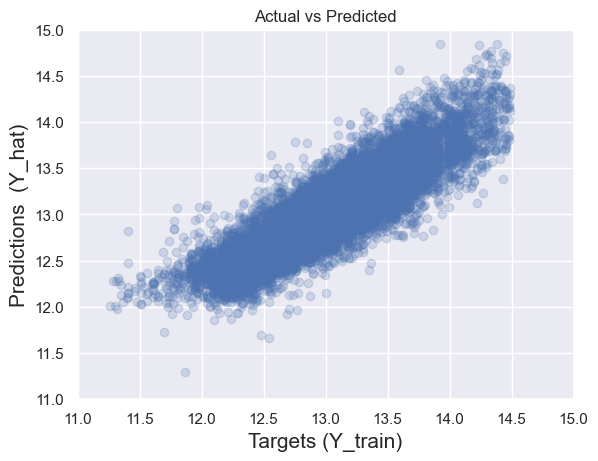

In [41]:
plt.scatter(y_train ,pred, alpha=0.2)
plt.xlabel('Targets (Y_train)', size=15)
plt.ylabel('Predictions  (Y_hat)', size=15)
plt.xlim(11,15)
plt.ylim(11,15)
plt.title('Actual vs Predicted')

This graph clearly demonstrates the high level of accuracy with which our model predicts the price of a house.

Residual PDF
Residual shows difference and mean between the targets and predictions

/var/folders/9m/6n635ztd50x4nk4tccn8jwbc0000gn/T/ipykernel_49000/3512139672.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train - pred)


<function matplotlib.pyplot.show(close=None, block=None)>

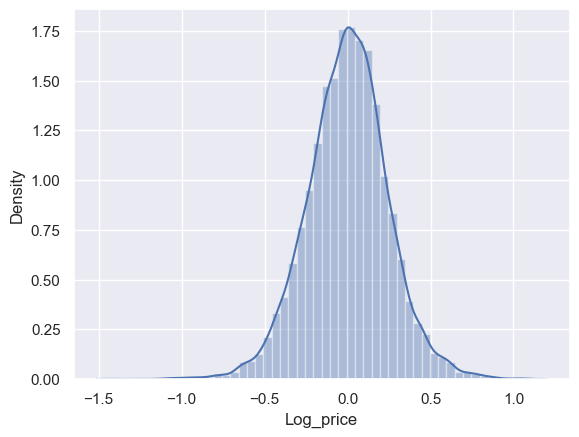

In [42]:
sns.distplot(y_train - pred)
plt.show

Based on the comparison, it appears that the predicted price is quite similar to the actual price.

In [43]:
reg.score(x_train,y_train)

0.7600645723803474


The R2 score being 76% signifies response variable variation that the linear Regression Model explains.

features and weights

Checking how much weight each feature has into predicting the price. While positive weight increases, so do price. If it is decreased, so is the price. Values are standardized. Could be used for feature selection

In [44]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['weights'] = reg.coef_
reg_summary

,Features,weights
0,id,0.001
1,date,0.025
2,bedrooms,-0.011
3,bathrooms,0.044
4,sqft_living,-837036738842.995
5,sqft_lot,-0.026
6,floors,0.037
7,waterfront,0.028
8,view,0.042
9,condition,0.042


In [45]:
pred_test = reg.predict(x_test)

Scatter Plot(Trained vs Predicted X_test)

Plotting the predicted and testing data in a scatter plot to show efficency of model predictions

Text(0.5, 1.0, 'Targets Y_train vs Predicted')

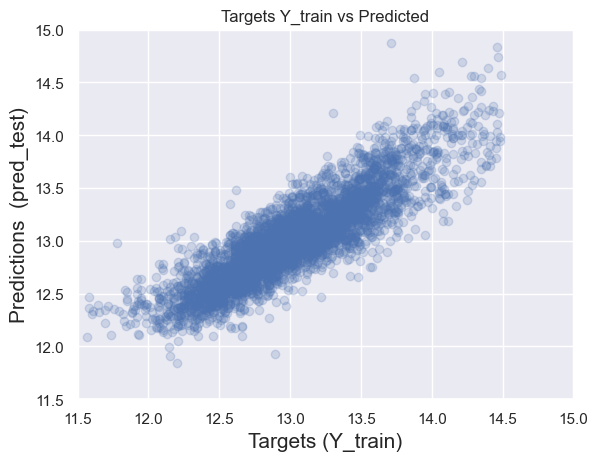

In [46]:
plt.scatter(y_test ,pred_test, alpha=0.2)
plt.xlabel('Targets (Y_train)', size=15)
plt.ylabel('Predictions  (pred_test)', size=15)
plt.xlim(11.5,15)
plt.ylim(11.5,15)
plt.title('Targets ''Y_train'' vs Predicted')

The linear regression model was trained using various features of the houses in King City to predict their prices. The model's performance was evaluated using metrics such as R-squared (R2) score.

Based on the model's analysis, several key drivers significantly impact house prices in King City. These drivers can help us understand the factors that potential buyers and sellers should consider. Here are some main drivers identified by the model:

Location: The location of a house is a critical factor influencing its price. Properties in desirable neighborhoods, close to amenities such as schools, parks, shopping centers, and transportation, tend to have higher prices. The model indicates that location has a positive impact on house prices.

Size and Square Footage: The size of a house, typically measured in square footage, has a direct influence on its price. Larger houses with more living space generally command higher prices. The model suggests that square footage has a positive impact on house prices.

Number of Bedrooms and Bathrooms: The number of bedrooms and bathrooms is an essential consideration for buyers and affects the house price. Houses with more bedrooms and bathrooms tend to be more valuable. The model indicates that an increase in the number of bedrooms and bathrooms has a positive impact on house prices.

Property Characteristics: Specific features or characteristics of a property, such as the presence of a pool, a garden, or a garage, can impact the house price. These features can vary depending on buyer preferences and market demand. The model reveals that certain property characteristics have a positive impact on house prices.

Economic Factors: Economic factors, such as the overall health of the economy, employment opportunities, and income levels in the area, can influence house prices. When the economy is strong and there are thriving job markets, house prices tend to rise. The model suggests that economic factors have a positive impact on house prices.

It is crucial to understand that the effect of each factor on house prices can be measured with different weights. The model determines these impacts by estimating the weights of various variables. The variables such as such as sqft_above, sqft_basement, lat, grade, sqft_living15, condition, view, and bathrooms have a significant influence on the price of a house. When the weight is positive, it means that an increase in that factor will lead to a rise in house prices. Conversely, a negative weight indicates that an increase in that factor will result in a decrease in house prices